<a href="https://colab.research.google.com/github/klisman02/Data-Analysis-Project/blob/main/basic-neural-network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [7]:
transform = transforms.ToTensor() #definindo a conversão da imagem

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #Carrega a parte do treino no DATASET
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) #Carrega a parte do teste no DATASET
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) #Cria um buffer para pegar os dados por partes

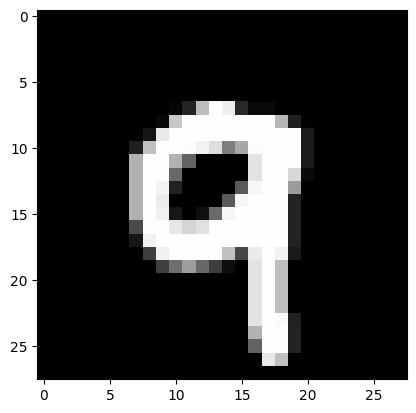

In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.__next__()

plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [10]:
print(images[0].shape) #para verificar as dimensões do tensor de cada imagem
print(labels[0].shape)#para verificar as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [11]:
#https://keras.io/api/applications/

class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28 * 28, 128) #input layer
    self.linear2 = nn.Linear(128, 64) #hidden layer
    self.linear3 = nn.Linear(64, 10)


  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return F.log_softmax(x, dim=1)

In [13]:
def treino(modelo, trainloader, device):

  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) #define o otimizador
  inicio = time() #timer para sabermos quanto tempo levou o treino

  criterio = nn.NLLLoss() #definindo o criterio para calcular a perda
  EPOCHS = 10 #numero de epochs que o algoritmo rodará
  modelo.train() #define o modelo para o modo de treino

  for epoch in range(EPOCHS):
    perda_acumulada = 0 #inicializa a perda acumulada para o epoch

    for images, labels in trainloader:

      images = images.view(images.shape[0], -1) #flattening / convertendo imagens para "vetores" de 28*28
      otimizador.zero_grad() #zera os gradientes

      output = modelo(images.to(device)) #colocando dados no modelo
      perda_instantanea = criterio(output, labels.to(device)) #calculando a perda

      perda_instantanea.backward() #backpropagation
      otimizador.step() #atualizando os pesos

      perda_acumulada += perda_instantanea.item() #acumulando a perda

    else:
      print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))



